# Курсовая работа, Фундаментальные концепции ИИ

> **Diabetes Dataset** - A dataset of 9,538 records on diabetes risk factors and diagnosis outcomes;

> **Исполнил:** Гимазетдинов Дмитрий, М8О-109СВ-24;

> **Тип:** Хвост 1 семестр.

# Краткое описание датасета

Этот набор данных содержит `9_538` медицинских записей, связанных с диагнозом диабета и факторами риска. Он включает различные параметры здоровья, привычки образа жизни и генетическую предрасположенность, которые вносят свой вклад в риск развития диабета. Данные структурированы с реалистичным распределением, что делает их ценными для медицинских исследований, статистического анализа и приложений машинного обучения.

## Описание факторов

| Фактор             | Описание | Диапазон значений |
|--------------------|---------|------------------|
| **Age** | Возраст пациента | 18 - 90 лет |
| **Pregnancies** | Количество беременностей (для женщин) | Целые числа (0+) |
| **BMI** | Индекс массы тела (вес/рост²) | Положительные числа |
| **Glucose** | Уровень глюкозы в крови (mg/dL) | Положительные числа |
| **BloodPressure** | Систолическое давление (mmHg) | Положительные числа |
| **HbA1c** | Уровень гемоглобина A1c (%) | Положительные числа |
| **LDL** | "Плохой" холестерин (mg/dL) | Положительные числа |
| **HDL** | "Хороший" холестерин (mg/dL) | Положительные числа |
| **Triglycerides** | Триглицериды в крови (mg/dL) | Положительные числа |
| **WaistCircumference** | Окружность талии (см) | Положительные числа |
| **HipCircumference** | Окружность бедер (см) | Положительные числа |
| **WHR** | Соотношение талия/бедра | Положительные числа |
| **FamilyHistory** | Наличие диабета у родственников | 0 = Нет, 1 = Да |
| **DietType** | Тип питания | 0 = Несбалансированное, 1 = Сбалансированное, 2 = Веган/вегетарианское |
| **Hypertension** | Гипертония | 0 = Нет, 1 = Да |
| **MedicationUse** | Прием лекарств | 0 = Нет, 1 = Да |
| **Outcome** | Диагноз диабета | 0 = Нет, 1 = Да |


# Импорт библиотек

In [387]:
# === Работа с Dataset ===
import pandas as pd
import numpy as np
import joblib

# === Визуализация ===
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# === Работа с данными, предобработка, разбиение ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# === Машинное обучение ===
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

# === Интерактив (для Jupyter) ===
import ipywidgets as widgets
from IPython.display import display

# === Табличное представление ===
from tabulate import tabulate

# === Поддержка аннотаций типов ===
from typing import Tuple, List, Union

# Реализация DataLoader (загрузчика)

## Описание функционала класса `DiabetesDatasetLoader`

### Методы и их назначение:
1. **`__init__(file_path: str)`**  
   - Загружает CSV-файл в `pandas.DataFrame`.  

2. **`get_head() -> pd.DataFrame`**  
   - Возвращает **первые три строки** датасета.  

3. **`get_tail() -> pd.DataFrame`**  
   - Возвращает **последние три строки** датасета.  

4. **`get_random_samples(n: int = 5) -> pd.DataFrame`**  
   - Возвращает **`n` случайных записей** из датасета (по умолчанию 5).  

5. **`get_range(start: int, end: int) -> pd.DataFrame`**  
   - Возвращает **диапазон строк** по индексам `[start:end]`.  

6. **`split_data(test_size: float = 0.2, random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]`**  
   - Делит данные на **обучающую** и **тестовую** выборки (по умолчанию 80/20).

In [388]:
class DiabetesDatasetLoader:
    """
    Класс для загрузки и анализа датасета Diabetes Dataset.
    """

    def __init__(self, file_path: str):
        """
        Инициализация загрузчика с чтением датасета.
        :param file_path: Путь к CSV файлу.
        """
        self.df = pd.read_csv(file_path)

    def get_head(self) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Возвращает первые три строки датасета.
        :return: Кортеж из двух DataFrame (первые и последние строки).
        """
        return self.df.head(3)

    def get_tail(self) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Возвращает последние три строки датасета.
        :return: Кортеж из двух DataFrame (первые и последние строки).
        """
        return self.df.tail(3)

    def get_random_samples(self, n: int = 5) -> pd.DataFrame:
        """
        Возвращает n случайных записей из датасета.
        :param n: Количество случайных записей (по умолчанию 5).
        :return: DataFrame с случайными строками.
        """
        return self.df.sample(n)

    def get_range(self, start: int, end: int) -> pd.DataFrame:
        """
        Возвращает записи в указанном диапазоне индексов.
        :param start: Начальный индекс.
        :param end: Конечный индекс.
        :return: DataFrame с записями в диапазоне.
        """
        return self.df.iloc[start:end]

    def split_data(self, test_size: float = 0.2, random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Разделяет данные на обучающую и тестовую выборку.
        :param test_size: Доля тестовой выборки (по умолчанию 0.2).
        :param random_state: Начальное значение генератора случайных чисел.
        :return: Кортеж (train, test) DataFrame.
        """
        train, test = train_test_split(self.df, test_size=test_size, random_state=random_state)
        return train, test

## Описание функционала класса `DiabetesStatistics`

### Методы и их назначение:

1. **`__init__(df: pd.DataFrame)`**  
   - Принимает `DataFrame` с данными и сохраняет его внутри объекта.  

2. **`describe_data(toStr: bool = False) -> Union[str, pd.DataFrame]`**  
   - Возвращает **основную статистику** (`count`, `mean`, `std`, `min`, `max`, `percentiles`).  
   - Если `toStr=True`, возвращает таблицу в текстовом формате (использует `tabulate`).  

3. **`plot_distribution(column: str) -> None`**  
   - Строит **гистограмму распределения** выбранного столбца с `kde` (плотностью).  

4. **`interactive_plot_distribution() -> None`**  
   - Создает **интерактивный виджет** для выбора столбца и отображения его распределения.  
   - Полезно при работе в Jupyter Notebook.  

5. **`plot_correlation_matrix() -> None`**  
   - Визуализирует **корреляционную матрицу** с `heatmap` (`seaborn`).  

6. **`plot_all_distributions(columns_per_row: int = 3) -> None`**  
   - Строит **гистограммы распределений** для всех столбцов датасета.  
   - Распределяет графики в виде сетки (`columns_per_row` на строку).

In [389]:
class DiabetesStatistics:
    """
    Класс для вычисления статистики и визуализации датасета.
    """

    def __init__(self, df: pd.DataFrame):
        """
        Инициализация с передачей датасета.
        :param df: DataFrame с данными.
        """
        self.df = df

    def describe_data(self, toStr = False) -> Union[str, pd.DataFrame]:
        """
        Возвращает основную статистику датасета в виде таблицы.
        :return: Строка с таблицей статистики.
        """
        if toStr:
            return tabulate(self.df.describe(), headers='keys', tablefmt='psql')
        return self.df.describe()

    def plot_distribution(self, column: str) -> None:
        """
        Строит график распределения для указанного признака.
        :param column: Название столбца.
        """
        plt.figure(figsize=(8, 5))
        sns.histplot(self.df[column], kde=True)
        plt.title(f'Распределение {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.show()

    def interactive_plot_distribution(self) -> None:
        """
        Создает интерактивный виджет для выбора признака и отображения его распределения.
        """
        column_selector = widgets.Dropdown(
            options=self.df.columns,
            description='Фактор:',
            style={'description_width': 'initial'}
        )

        def update_plot(column: str):
            plt.figure(figsize=(8, 5))
            sns.histplot(self.df[column], kde=True)
            plt.title(f'Распределение {column}')
            plt.xlabel(column)
            plt.ylabel('Частота')
            plt.show()

        output = widgets.Output()

        def on_change(change):
            with output:
                output.clear_output(wait=True)
                update_plot(change['new'])

        column_selector.observe(on_change, names='value')
        display(column_selector, output)

    def plot_correlation_matrix(self) -> None:
        """
        Визуализирует корреляционную матрицу признаков.
        """
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
        plt.title('Корреляционная матрица')
        plt.show()

    def plot_all_distributions(self, columns_per_row: int = 3) -> None:
        """
        Строит матрицу графиков распределения для всех факторов.
        :param columns_per_row: Количество графиков в строке (по умолчанию 3).
        """
        num_columns = len(self.df.columns)
        num_rows = (num_columns + columns_per_row - 1) // columns_per_row

        fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(columns_per_row * 5, num_rows * 4))
        axes = axes.flatten()

        for i, column in enumerate(self.df.columns):
            sns.histplot(self.df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Распределение {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Частота')

        for i in range(num_columns, len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()

## Тестирование классов

**Создадим следующие глобальные переменные:**

| переменная|                     роль                   |
|-----------|--------------------------------------------|
|data_path  |   Путь до csv                              |
|dump_path  |   Путь до дампа                            |
|data_loader|   Загрузчик                                |
|df         |   Загруженные csv данные                   |
|data_stat  |   Статистика                               |


In [390]:
data_path = '/content/drive/MyDrive/diabetes_dataset.csv'
dump_path = '/content/drive/MyDrive'
data_loader = DiabetesDatasetLoader(data_path)
df = data_loader.df
data_stat = DiabetesStatistics(df)

### Тестирование API DiabetesDatasetLoader

In [391]:
# Получить первые записи
data_loader.get_head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0


In [392]:
# Получить последние записи
data_loader.get_tail()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
9535,75,6,26.10,107.6,75.0,5.0,168.5,62.3,149.8,84.0,114.9,0.73,0,0,0,1,0
9536,52,1,25.88,99.3,96.0,4.6,70.0,48.4,122.9,97.5,88.7,1.10,1,0,0,0,1
9537,33,3,25.61,69.1,65.0,4.0,69.0,59.4,169.5,79.7,101.1,0.79,0,1,0,0,0


In [393]:
# Получение случайные 5 строк
data_loader.get_random_samples()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
7274,51,11,21.45,82.2,60.0,4.5,31.5,71.3,89.9,80.0,100.2,0.80,0,1,0,0,0
2156,38,16,19.63,95.0,77.0,4.1,91.0,28.3,267.9,63.1,69.8,0.90,1,2,0,0,1
3552,56,12,31.58,146.3,100.0,5.6,102.4,82.9,211.2,105.3,104.9,1.00,0,0,0,0,1
1135,79,16,26.78,99.5,92.0,4.2,142.3,51.1,172.2,97.7,78.7,1.24,1,1,0,1,1
6854,40,1,35.86,131.5,76.0,5.6,134.9,74.1,142.2,115.6,130.3,0.89,0,1,0,0,0


In [394]:
# Получение информации из диапозона [5, 10)
data_loader.get_range(5, 10)

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
5,41,10,17.47,67.0,71.0,4.2,105.3,58.8,140.7,81.8,93.2,0.88,1,0,0,0,1
6,20,16,15.76,61.6,60.0,4.0,62.4,43.4,64.6,66.5,102.7,0.65,0,1,0,0,0
7,39,4,28.11,105.0,94.0,4.5,91.0,50.1,195.5,123.2,121.4,1.01,1,0,0,0,1
8,70,3,24.32,83.8,90.0,4.0,144.1,51.3,156.5,79.3,105.4,0.75,0,1,0,1,0
9,19,1,16.63,66.5,62.0,4.0,98.9,64.3,91.1,70.8,93.1,0.76,1,0,0,0,1


### Тестирование API DiabetesStatistics

#### Cтатистические показатели
- **Средний возраст** — около **53 лет**.
- **Среднее значение глюкозы** — **106 мг/дл**, что близко к норме, но есть отклонения вплоть до **207 мг/дл**, что говорит о возможных случаях диабета.
- **ИМТ в среднем — 27**, что указывает на избыточный вес у большинства респондентов.
- **Кровяное давление в среднем — 84**, что соответствует норме, но максимальные значения доходят до **138**.
- **HbA1c в среднем — 4.65**, что указывает на нормальный уровень, но диапазон до **6.9** может включать диабетиков.
- **Отрицательные значения LDL и HDL** являются аномальными.

In [395]:
# Основная статистика факторов
data_stat.describe_data(toStr=False)

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


#### Корреляционный анализ
Из корреляционной матрицы можно выделить:
- **Глюкоза (Glucose)** и **HbA1c** имеют высокую положительную корреляцию (**0.82**), что логично, так как оба параметра измеряют уровень сахара.
- **BMI, WaistCircumference и HipCircumference** коррелируют между собой (**0.76, 0.66**), что указывает на взаимосвязь ожирения с этими параметрами.
- **Возраст (Age)** положительно коррелирует с **Glucose (0.49)** и **BloodPressure (0.43)**, что подтверждает возрастное увеличение этих факторов.
- **Outcome (Результат заболевания)** коррелирует с **Glucose (0.10), BMI (0.11) и HbA1c (0.15)**, но значения не слишком высокие.

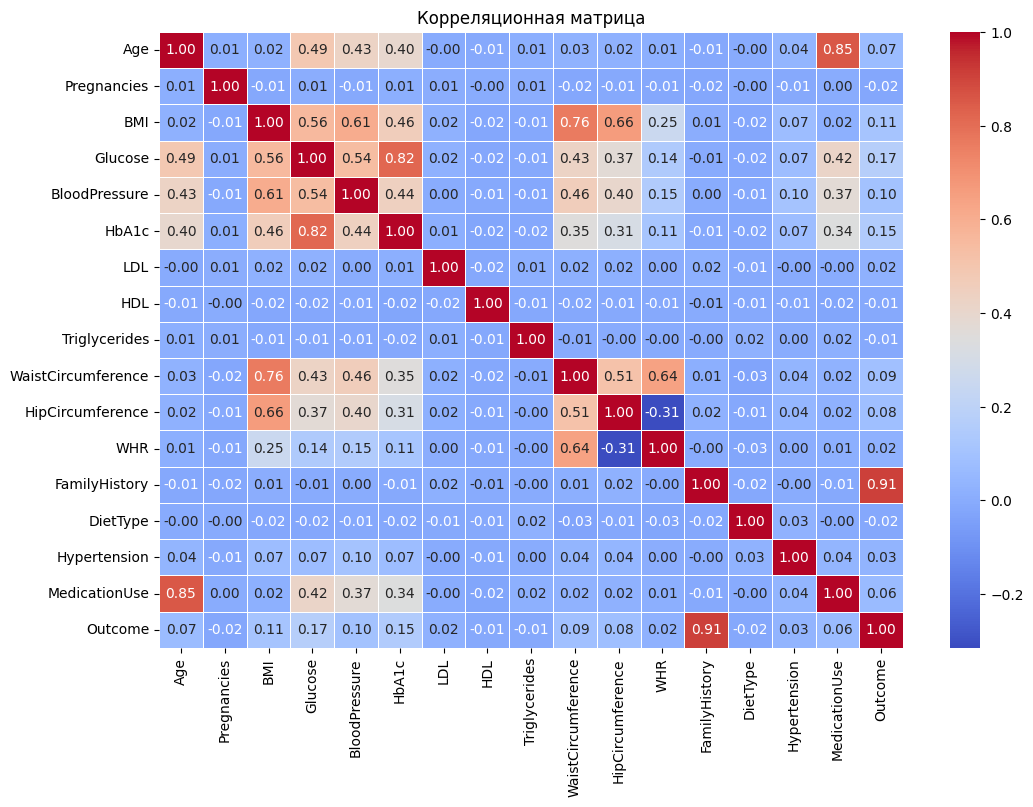

In [396]:
# Визуализирует корреляционную матрицу признаков
data_stat.plot_correlation_matrix()

#### Распределение данных
По предоставленным графикам можно выделить несколько ключевых моментов:
- **Возраст (Age)** имеет равномерное распределение без явных выбросов.
- **Количество беременностей (Pregnancies)** распределено почти равномерно.
- **ИМТ (BMI)**, **глюкоза (Glucose)**, **HbA1c**, **ЛПНП (LDL)**, **ЛПВП (HDL)**, **триглицериды (Triglycerides)**, **окружность талии (WaistCircumference)**, **окружность бедер (HipCircumference)** и **WHR** приближены к нормальному распределению.
- **Кровяное давление (BloodPressure)** и **HbA1c** немного смещены влево, указывая на преобладание меньших значений.
- **История семьи (FamilyHistory), Тип диеты (DietType), Гипертония (Hypertension), Использование медикаментов (MedicationUse) и Исход (Outcome)** дискретные и имеют бимодальное распределение.

In [397]:
# Выбор отдельного графика
data_stat.interactive_plot_distribution()

Dropdown(description='Фактор:', options=('Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LD…

Output()

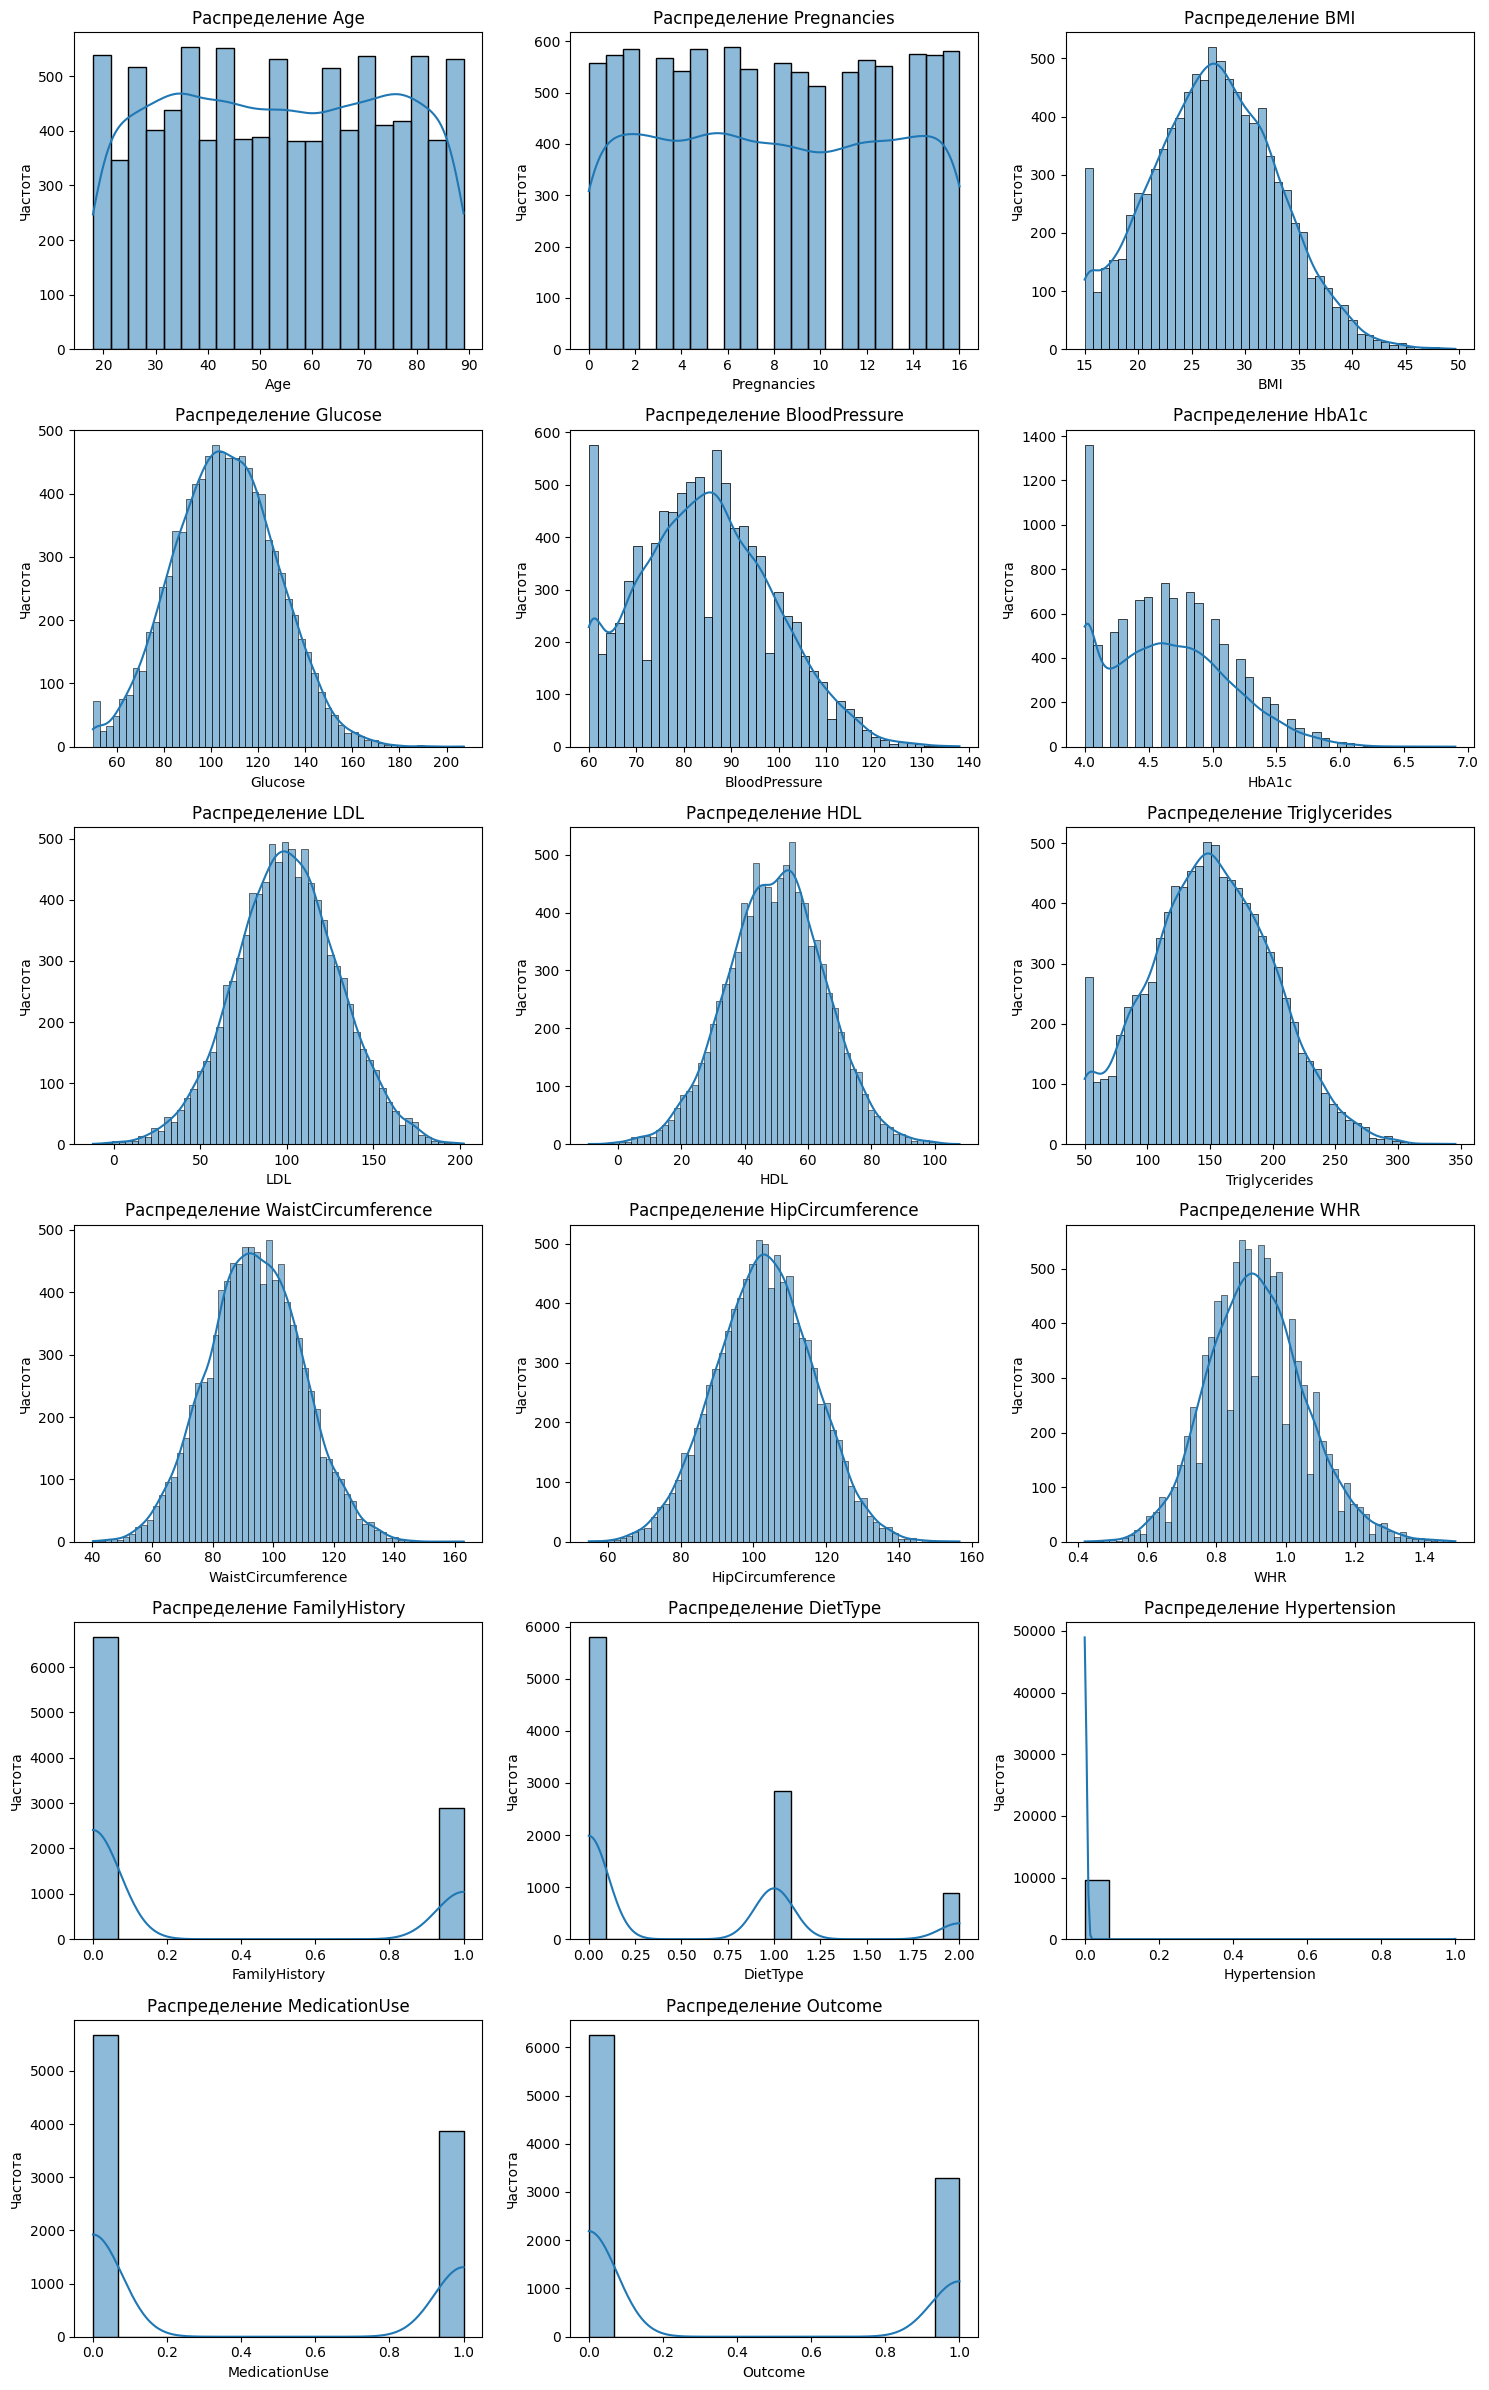

In [398]:
# Отображение всех факторов
data_stat.plot_all_distributions()

## Что необходимо сделать?
1. **Глюкоза и HbA1c являются ключевыми предикторами диабета**, что подтверждается их высокой корреляцией.
2. **Корреляция между BMI, окружностью талии и бедер** подтверждает, что избыточный вес является важным фактором риска.
3. **Для машинного обучения можно использовать линейные модели**, так как большинство признаков нормально распределены.

# Реализация алгоритма обучения

- Используем **логистическую регрессию (Logistic Regression)**, так как она хорошо работает с бинарной классификацией и интерпретируема.  
- Сохраним обученную модель, чтобы можно было использовать в инференсе.  
- Сделаем предсказания на 5 случайных примерах **до и после обучения**, чтобы сравнить качество.  
- Построим график точности для **train/test**, а также визуализируем метрики качества.

## Описание функционала класса `DiabetesModel`

Этот класс реализует **обучение, предобработку и оценку модели логистической регрессии** для предсказания диабета.  

### **Методы и их назначение:**  

1. **`__init__(data_path: str)`**  
   - Загружает путь к CSV-файлу.  
   - Инициализирует модель, масштабировщик (`StandardScaler`) и списки для метрик.  

2. **`load_data() -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]`**  
   - Загружает данные, разделяет **признаки (`X`)** и **цель (`y`)**.  
   - Делит на **train/test** с **стратификацией** (`stratify=y`).  

3. **`preprocess_data(X_train, X_test) -> Tuple[np.ndarray, np.ndarray]`**  
   - Масштабирует признаки с `StandardScaler`.  

4. **`train_model(X_train, y_train, X_test, y_test) -> None`**  
   - Обучает `LogisticRegression`, **итеративно увеличивая** `max_iter` (от 1 до 99).  
   - Логирует **accuracy (train/test)** и **log-loss**.  
   - **Сохраняет модель** и `scaler` с `joblib`.  
   - **Ошибка**: `dump_path` не определен (нужно заменить или добавить аргумент).  

5. **`evaluate_model(X_test, y_test) -> None`**  
   - Предсказывает классы на **тесте**.  
   - Вычисляет **accuracy** и строит **confusion matrix** (`heatmap`).  

6. **`plot_metrics() -> None`**  
   - Строит графики **Accuracy** (Train/Test) и **Log-Loss** за итерации.  

7. **`inference(X_test, y_test) -> None`**  
   - Берет **5 случайных записей** из теста.  
   - Выводит **реальные и предсказанные метки**.  


In [399]:
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

class DiabetesModel:
    def __init__(self, data_path: str):
        """
        Инициализация модели с путем к данным.

        :param data_path: Путь к CSV-файлу с данными.
        """
        self.data_path = data_path
        self.model = None  # Модель машинного обучения
        self.scaler = None  # Масштабатор для нормализации данных
        self.train_accuracies = []  # Список точности на обучающей выборке
        self.test_accuracies = []  # Список точности на тестовой выборке
        self.losses = []  # Список значений потерь (log_loss)

    def load_data(self) -> tuple:
        """
        Загрузка данных из CSV-файла и разделение на обучающую и тестовую выборки.

        :return: Кортеж из обучающих и тестовых данных (X_train, X_test, y_train, y_test)
        """
        df = pd.read_csv(self.data_path)
        X = df.drop(columns=['Outcome'])
        y = df['Outcome']
        return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    def preprocess_data(self, X_train: np.ndarray, X_test: np.ndarray) -> tuple:
        """
        Масштабирование данных с использованием StandardScaler.

        :param X_train: Обучающие данные.
        :param X_test: Тестовые данные.
        :return: Кортеж с масштабированными данными для обучения и тестирования.
        """
        self.scaler = StandardScaler()
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

    def train_model(self, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> None:
        """
        Обучение модели с логистической регрессией, с использованием различных значений max_iter для улучшения сходимости.

        :param X_train: Обучающие данные.
        :param y_train: Метки для обучающих данных.
        :param X_test: Тестовые данные.
        :param y_test: Метки для тестовых данных.
        """
        self.model = LogisticRegression(max_iter=40, solver='liblinear', tol=1e-3)

        # Обучение модели с различными значениями max_iter
        for i in range(1, 100):
            self.model.max_iter = i
            self.model.fit(X_train, y_train)

            # Оценка точности на обучающих и тестовых данных
            train_pred = self.model.predict(X_train)
            test_pred = self.model.predict(X_test)

            train_acc = accuracy_score(y_train, train_pred)
            test_acc = accuracy_score(y_test, test_pred)
            loss = log_loss(y_train, self.model.predict_proba(X_train))

            self.train_accuracies.append(train_acc)
            self.test_accuracies.append(test_acc)
            self.losses.append(loss)

        # Сохранение модели и scaler
        joblib.dump(self.model, f'{dump_path}/diabetes_model.pkl')
        joblib.dump(self.scaler, f'{dump_path}/scaler.pkl')

    def evaluate_model(self, X_test: np.ndarray, y_test: np.ndarray) -> None:
        """
        Оценка модели на тестовых данных и вывод матрицы ошибок.

        :param X_test: Тестовые данные.
        :param y_test: Метки для тестовых данных.
        """
        y_pred = self.model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f"Test Accuracy: {acc:.4f}")
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    def plot_metrics(self) -> None:
        """
        Построение графиков точности и потерь на каждой итерации обучения.
        """
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, 100), self.train_accuracies, label="Train Accuracy")
        plt.plot(range(1, 100), self.test_accuracies, label="Test Accuracy")
        plt.xlabel("Iterations")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.title("Accuracy Over Iterations")

        plt.subplot(1, 2, 2)
        plt.plot(range(1, 100), self.losses, label="Log Loss", color="red")
        plt.xlabel("Iterations")
        plt.ylabel("Log Loss")
        plt.title("Loss Reduction Over Iterations")
        plt.legend()

        plt.tight_layout()
        plt.show()

    def inference(self, X_test: np.ndarray, y_test: pd.Series) -> None:
        """
        Прогнозирование на случайной выборке тестовых данных.

        :param X_test: Тестовые данные.
        :param y_test: Метки для тестовых данных.
        """
        indices = np.random.choice(len(X_test), 5, replace=False)
        X_sample = X_test[indices]
        y_sample = y_test.iloc[indices]

        predictions = self.model.predict(X_sample)
        print("Real labels:", y_sample.values)
        print("Predicted labels:", predictions)


# Создание модели
model = DiabetesModel(data_path)

## Разделение на Test/Train

### Сырое разделение

In [400]:
X_train, X_test, y_train, y_test = model.load_data()
print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (7630, 16)
Размер тестовой выборки: (1908, 16)


In [401]:
X_train.head(5)

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse
6788,48,10,34.81,115.9,86.0,4.8,96.9,48.8,214.7,112.1,113.0,0.99,0,0,0,0
956,39,15,22.96,115.3,89.0,4.8,79.1,39.0,204.6,98.5,99.2,0.99,0,1,0,0
7880,79,10,24.19,110.4,94.0,4.7,112.8,46.6,96.6,88.7,93.7,0.95,0,0,0,1
6779,28,15,29.34,87.6,83.0,4.8,77.3,70.7,97.1,93.5,89.6,1.04,0,0,0,0
8081,69,6,20.87,81.8,74.0,4.0,99.6,28.9,128.6,70.0,100.0,0.70,1,0,0,1


### Нормализация данных

In [402]:
X_train_scaled, X_test_scaled = model.preprocess_data(X_train, X_test)
print(f"\nРазмер нормализованных данных обучающей выборки: {X_train_scaled.shape}")
print(f"\nРазмер нормализованных данных тестовой выборки: {X_test_scaled.shape}")


Размер нормализованных данных обучающей выборки: (7630, 16)

Размер нормализованных данных тестовой выборки: (1908, 16)


In [403]:
X_train_scaled[:5]

array([[-0.26944783,  0.40293257,  1.30876471,  0.4551542 ,  0.10200462,
         0.32724733, -0.10085551, -0.07534499,  1.30285273,  1.16781382,
         0.74455749,  0.51495999, -0.66037878, -0.73484218, -0.03030303,
        -0.82454636],
       [-0.70356596,  1.42255832, -0.69134542,  0.42761161,  0.31476987,
         0.32724733, -0.69511881, -0.72045175,  1.09567993,  0.29258267,
        -0.28595585,  0.51495999, -0.66037878,  0.7788851 , -0.03030303,
        -0.82454636],
       [ 1.22584793,  0.40293257, -0.48373905,  0.20268048,  0.66937862,
         0.11600392,  0.42997518, -0.22016488, -1.11963318, -0.3380986 ,
        -0.69666769,  0.23006388, -0.66037878, -0.73484218, -0.03030303,
         1.21278808],
       [-1.23415478,  1.42255832,  0.38550712, -0.84393787, -0.11076062,
         0.32724733, -0.75521285,  1.36627113, -1.10937711, -0.02919349,
        -1.0028347 ,  0.87108013, -0.66037878, -0.73484218, -0.03030303,
        -0.82454636],
       [ 0.74349446, -0.41276802, -1

## Обучение

In [404]:
# Запуск обучения
model.train_model(X_train_scaled, y_train, X_test_scaled, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Test Accuracy: 0.9953


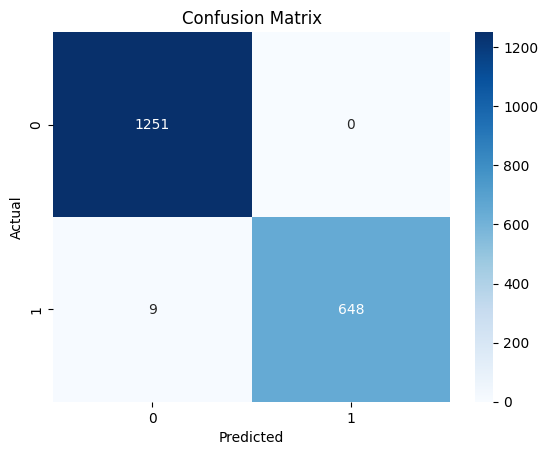

In [405]:
# Оценка модели на тестовых данных и вывод матрицы ошибок
model.evaluate_model(X_test_scaled, y_test)

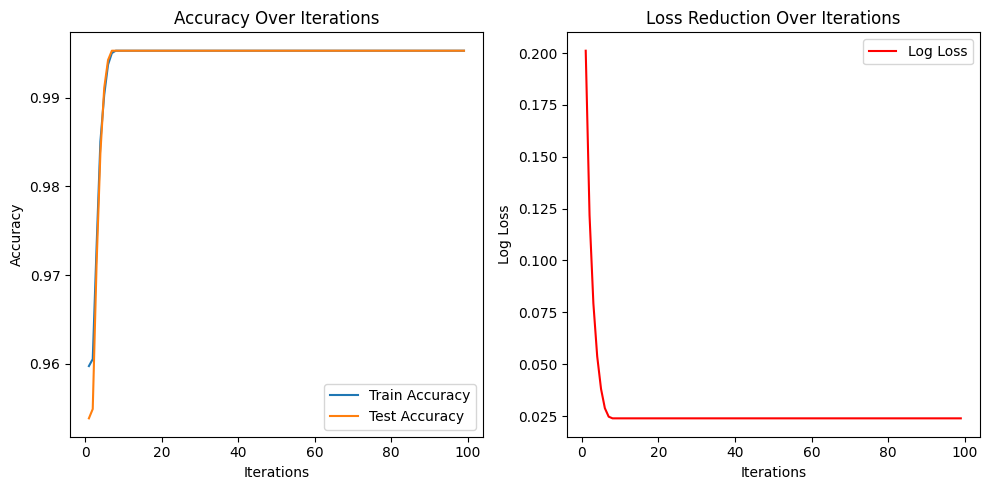

In [406]:
# Построение графиков точности и потерь на каждой итерации обучения
model.plot_metrics()

## Инференс на тестовых данных

In [407]:
# Прогнозирование на случайной выборке тестовых данных
model.inference(X_test_scaled, y_test)

Real labels: [1 0 0 1 1]
Predicted labels: [1 0 0 1 1]


# Кластеризация и понижение размерности

Класс `DiabetesClustering` реализует несколько методов для анализа данных с помощью методов кластеризации и уменьшения размерности. Краткое описание функционала каждого метода:

1. **`__init__(self, data, target_column='Outcome') -> None`**:
   - Инициализирует объект с переданным датасетом, удаляя целевую переменную (если она есть, по умолчанию это колонка `Outcome`).

2. **`apply_pca(self, n_components=3) -> None`**:
   - Применяет метод главных компонент (PCA) для уменьшения размерности данных до указанного числа компонент (по умолчанию 3).

3. **`plot_pca_3d(self) -> None`**:
   - Визуализирует результат PCA в 3D пространстве, показывая данные после уменьшения размерности.

4. **`elbow_method(self, max_k=10) -> None`**:
   - Реализует метод локтя для поиска оптимального числа кластеров для алгоритма K-Means. Метод строит график зависимости инерции от числа кластеров.

5. **`apply_kmeans(self, n_clusters=3) -> None`**:
   - Применяет алгоритм K-Means с заданным числом кластеров (по умолчанию 3) к данным, уменьшенным с помощью PCA.

6. **`plot_clusters_3d(self) -> None`**:
   - Визуализирует результаты кластеризации в 3D, показывая распределение кластеров в пространстве после применения PCA.

7. **`plot_clusters_2d(self) -> None`**:
   - Визуализирует результаты кластеризации в 2D, отображая кластеры на плоскости, использующей первые две главные компоненты.

In [408]:
class DiabetesClustering:
    def __init__(self, data, target_column='Outcome') -> None:
        """Инициализация с датасетом. Убираем целевую переменную, если она есть."""
        self.df = data.drop(columns=[target_column], errors='ignore')
        self.pca_result = None
        self.kmeans = None
        self.y_kmeans = None

    def apply_pca(self, n_components=3) -> None:
        """Применяем PCA для уменьшения размерности."""
        pca = PCA(n_components=n_components)
        self.pca_result = pca.fit_transform(self.df)

    def plot_pca_3d(self) -> None:
        """Визуализация результатов PCA в 3D."""
        fig = plt.figure(figsize=(8, 6), dpi=120)
        ax = fig.add_subplot(projection='3d')
        ax.scatter(self.pca_result[:, 0], self.pca_result[:, 1], self.pca_result[:, 2], c=self.pca_result[:, 2], cmap='viridis')
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_zlabel('PC 3')
        ax.set_title('PCA in 3D')
        plt.show()

    def elbow_method(self, max_k=10) -> None:
        """Метод локтя для определения оптимального k."""
        inertia = []
        for k in range(1, max_k + 1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(self.pca_result)
            inertia.append(kmeans.inertia_)

        plt.figure(figsize=(8, 6))
        plt.plot(range(1, max_k + 1), inertia, marker='o', color='b')
        plt.title('Метод локтя для KMeans')
        plt.xlabel('Количество кластеров (k)')
        plt.ylabel('Инерция')
        plt.grid(True)
        plt.show()

    def apply_kmeans(self, n_clusters=3) -> None:
        """Применение K-Means с заданным числом кластеров."""
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        self.y_kmeans = self.kmeans.fit_predict(self.pca_result)

    def plot_clusters_3d(self) -> None:
        """Визуализация кластеров в 3D."""
        fig = plt.figure(figsize=(10, 8), dpi=120)
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.pca_result[:, 0], self.pca_result[:, 1], self.pca_result[:, 2], c=self.y_kmeans, cmap='viridis', s=50, alpha=0.6)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_zlabel('PC 3')
        ax.set_title('K-Means Clustering in 3D')
        plt.show()

    def plot_clusters_2d(self) -> None:
        """Визуализация кластеров в 2D (проекция PCA)."""
        fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
        scatter = ax.scatter(self.pca_result[:, 0], self.pca_result[:, 1], c=self.y_kmeans, cmap='viridis', s=50, alpha=0.6)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_title('K-Means Clustering in 2D')
        plt.colorbar(scatter)
        plt.show()

# Пример использования:
df = pd.read_csv(data_path)
clustering = DiabetesClustering(df)

## Применяем метод главных компонент (PCA)

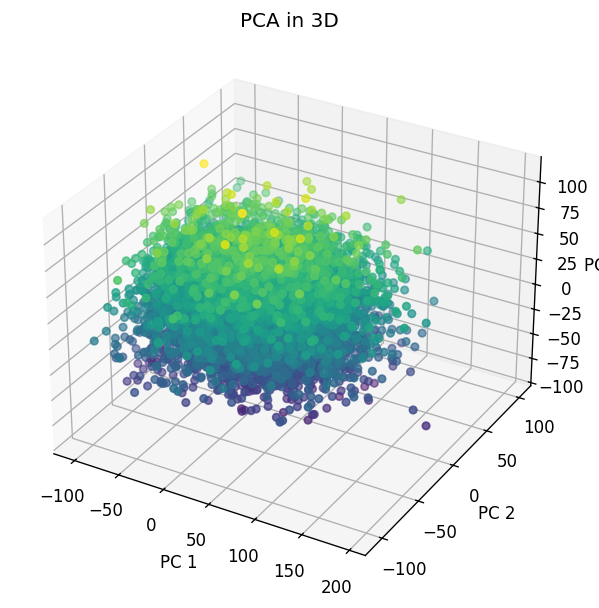

In [409]:
clustering.apply_pca()
clustering.plot_pca_3d()

## Применяем метод локтя для определения оптимального k

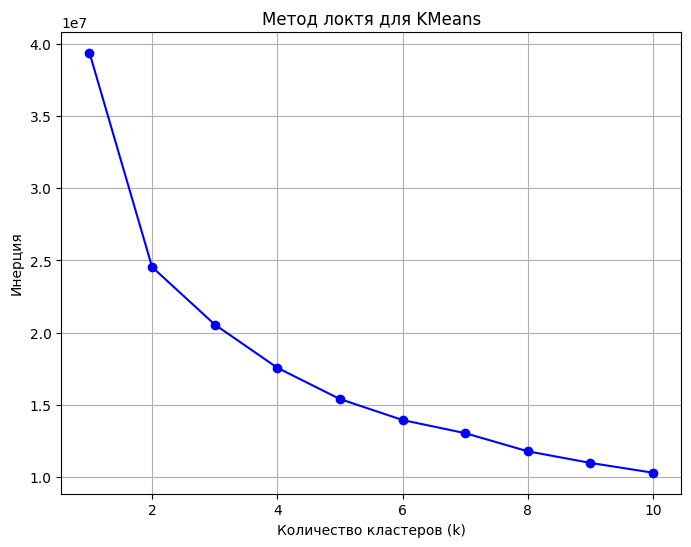

In [410]:
clustering.elbow_method()

## Применяем метод K-Means

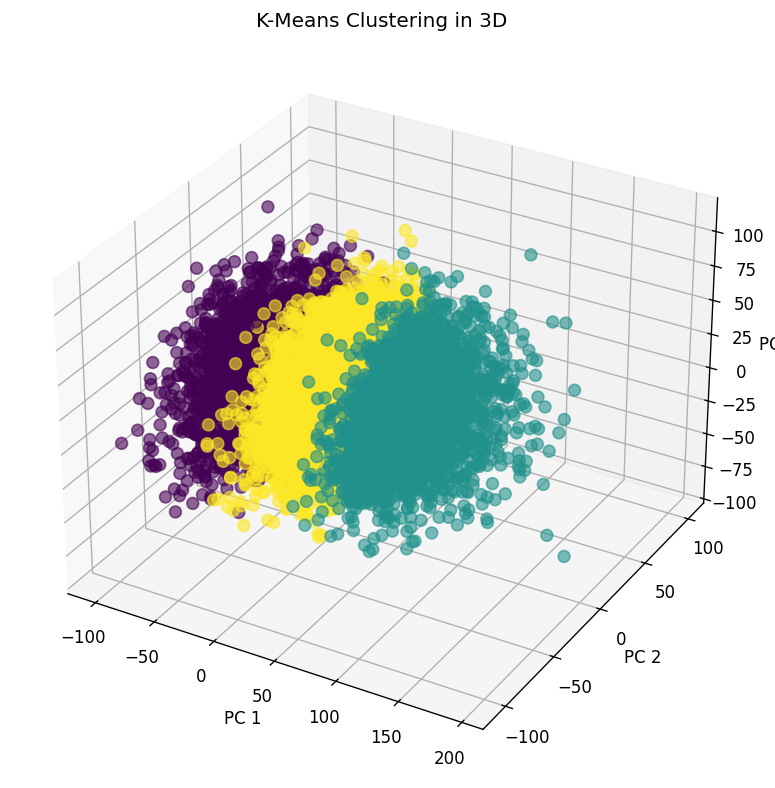

In [411]:
clustering.apply_kmeans(n_clusters=3)
clustering.plot_clusters_3d()

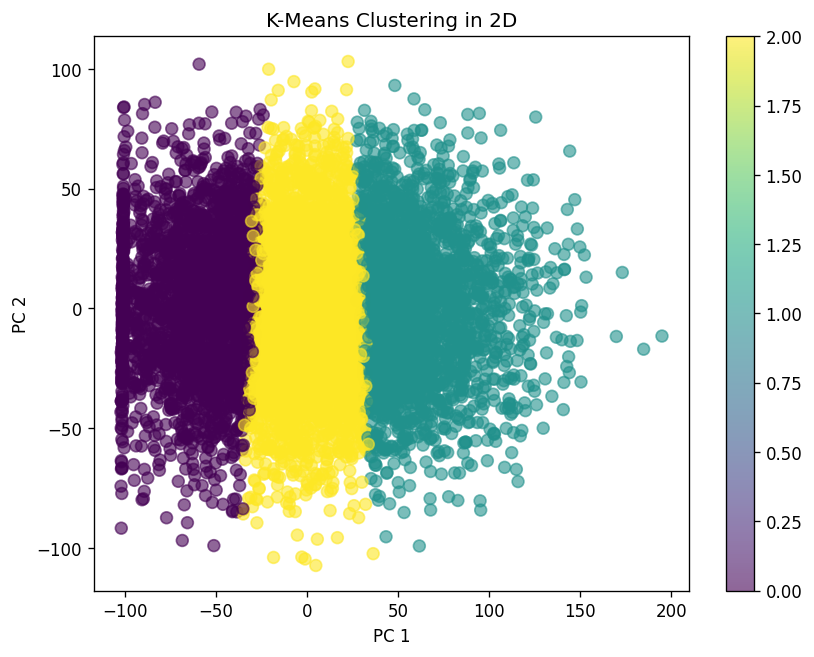

In [412]:
clustering.plot_clusters_2d()

# Выбросы (Outlayers)

Класс `DiabetesOutliers` предназначен для нахождения и визуализации выбросов в данных, которые были обработаны с помощью методов уменьшения размерности (PCA) и кластеризации (K-Means). Краткое описание функционала каждого метода:

1. **`__init__(self, pca_result, kmeans, percentile=97)`**:
   - Инициализирует объект с результатами PCA (уменьшенной размерностью данных), моделью KMeans (для кластеризации), и параметром `percentile`, который задает порог для определения выбросов.

2. **`find_outliers(self)`**:
   - Ищет выбросы, вычисляя расстояние каждого наблюдения до ближайшего центроида кластеров. Наблюдения, чьи расстояния превышают порог (определяемый по процентилю), считаются выбросами.
   - Выводит количество найденных выбросов.

3. **`plot_outliers_3d(self)`**:
   - Визуализирует выбросы в 3D пространстве, отображая все данные в сером цвете и выделяя выбросы красным. Если выбросы еще не найдены (метод `find_outliers()` не был вызван), выводится предупреждение.

4. **`plot_outliers_2d(self)`**:
   - Визуализирует выбросы в 2D, показывая данные на плоскости, использующей первые две главные компоненты PCA. Все данные отображаются серым цветом, а выбросы выделяются красным. Если выбросы не найдены, выводится предупреждение.

In [413]:
class DiabetesOutliers:
    def __init__(self, pca_result, kmeans, percentile=97):
        """Инициализация с PCA-результатами и моделью KMeans"""
        self.pca_result = pca_result
        self.kmeans = kmeans
        self.percentile = percentile
        self.outliers = None

    def find_outliers(self):
        """Находит выбросы на основе расстояний до центроидов кластеров"""
        from scipy.spatial.distance import cdist

        centroids = self.kmeans.cluster_centers_
        distances = cdist(self.pca_result, centroids, 'euclidean')
        min_distances = np.min(distances, axis=1)

        threshold = np.percentile(min_distances, self.percentile)
        self.outliers = np.where(min_distances > threshold)[0]

        print(f"Найдено выбросов: {len(self.outliers)}")

    def plot_outliers_3d(self):
        """Визуализация выбросов в 3D"""
        if self.outliers is None:
            print("Сначала вызовите find_outliers()")
            return

        fig = plt.figure(figsize=(10, 8), dpi=120)
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(self.pca_result[:, 0], self.pca_result[:, 1], self.pca_result[:, 2], c='gray', alpha=0.5, s=50)
        ax.scatter(self.pca_result[self.outliers, 0], self.pca_result[self.outliers, 1], self.pca_result[self.outliers, 2],
                   c='red', s=100, label='Outliers')

        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_zlabel('PC 3')
        ax.set_title('Outliers in K-Means Clustering (3D)')
        plt.legend()
        plt.show()

    def plot_outliers_2d(self):
        """Визуализация выбросов в 2D"""
        if self.outliers is None:
            print("Сначала вызовите find_outliers()")
            return

        fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
        scatter = ax.scatter(self.pca_result[:, 0], self.pca_result[:, 1], c='gray', alpha=0.5, s=50)
        ax.scatter(self.pca_result[self.outliers, 0], self.pca_result[self.outliers, 1], c='red', s=100, label='Outliers')

        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_title('Outliers in K-Means Clustering (2D)')
        plt.colorbar(scatter)
        plt.legend()
        plt.show()

## Запуск детектора

In [414]:
outlier_detector = DiabetesOutliers(
    clustering.pca_result,
    clustering.kmeans
    )
outlier_detector.find_outliers()

Найдено выбросов: 287


##  Визуализация выбросов в 3D

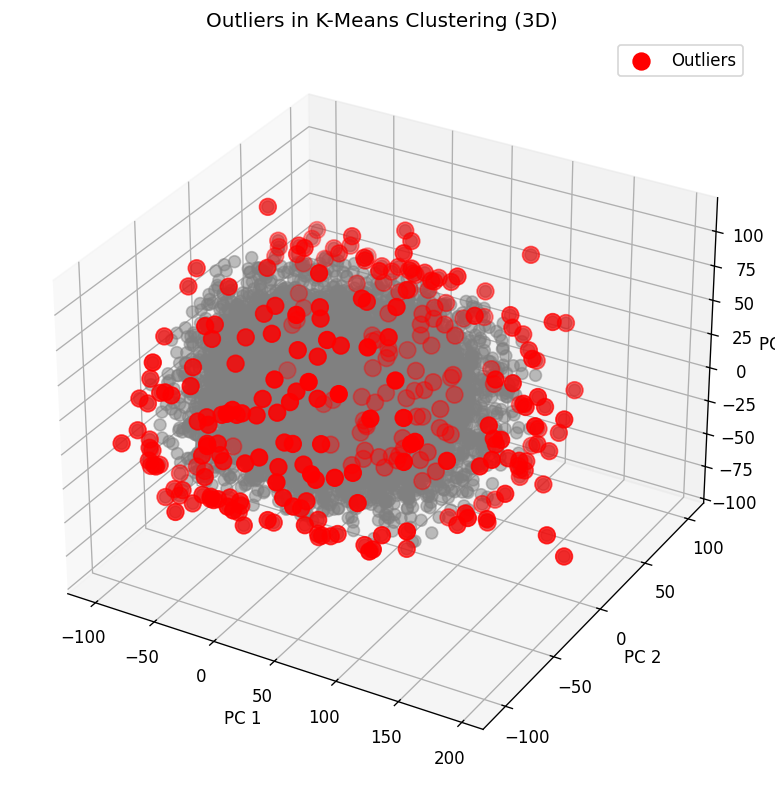

In [415]:
outlier_detector.plot_outliers_3d()

## Визуализация выболсов в 2D

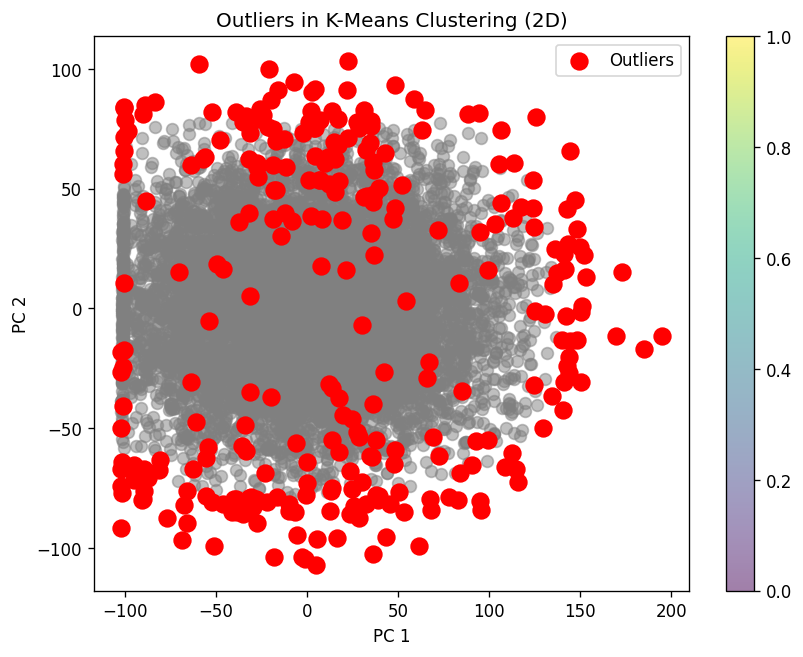

In [416]:
outlier_detector.plot_outliers_2d()

# ML System Design для анализа диабета  

### Где может использоваться датасет:  
1. **Прогнозирование риска диабета** – система раннего выявления диабета на основе медицинских показателей. Может использоваться в клиниках и страховых компаниях. *(Задача классификации)*  
2. **Персонализированные рекомендации по образу жизни** – анализ факторов риска и предложение индивидуальных рекомендаций по питанию, физической активности. *(Задача предсказания риска)*  
3. **Оптимизация медицинских решений** – помощь врачам в принятии решений о необходимости дополнительного обследования или лечения. *(Поддержка принятия решений)*  
4. **Мониторинг состояния пациента** – автоматический анализ изменений показателей пациента и прогнозирование ухудшений. *(Временные ряды, аномалии)*  
5. **Страховые модели** – определение уровня страховых рисков на основе вероятности развития диабета у клиентов. *(Риск-анализ)*  

#### **Преимущества датасета:**  
    ✔️ Содержит объективные медицинские параметры (глюкоза, давление, индекс массы тела и др.), что делает его применимым в реальных системах.  
    ✔️ Достаточно сбалансирован и может использоваться как для классификации, так и для кластеризации.  
    ✔️ Может быть интегрирован в медицинские решения, рекомендательные системы и страховую аналитику.  

#### **Недостатки датасета:**  
    ❌ Ограниченное количество признаков – нет информации о питании, физической активности, наследственности.  
    ❌ Датасет содержит только конечный диагноз (Outcome), но не учитывает динамику изменений параметров со временем.  
    ❌ Не разделён по возрастным группам, что могло бы улучшить точность прогнозов.  
    ❌ Возможны выбросы и шум в данных, что требует дополнительной обработки.  
